In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
sys.path.append(os.path.abspath('../scripts'))
from utils import *


1. Mean Squared Error (MSE): A measure of the average squared difference between the predicted values and the actual values. Lower MSE indicates better model performance. In this case, the MSE is 14.20.
2. R-squared: A measure of how well the model explains the variance in the target variable. It ranges from 0 to 1

In [2]:
df = pd.read_csv('../data/processed/data_processed.csv')

df.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.428571,1.0,1.0,1.00,1.00,0.00,1.00,0.000000,0.000000,...,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.263158,0.315789,6
1,0.0,0.285714,1.0,0.0,0.25,0.25,0.00,0.75,0.000000,0.333333,...,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.263158,0.263158,6
2,0.0,0.000000,0.0,0.0,0.25,0.25,0.00,0.75,1.000000,0.000000,...,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.368421,0.421053,10
3,0.0,0.000000,1.0,0.0,1.00,0.50,0.25,0.50,0.333333,0.000000,...,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.789474,0.736842,15
4,0.0,0.142857,1.0,0.0,0.75,0.75,0.75,0.75,0.333333,0.333333,...,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.315789,0.526316,10


Linear Regression Model

In [8]:
X = df.drop(columns=['G3'])
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = linear_model.predict(X_test)
evaluate_model(y_test, y_pred)

Mean Squared Error: 3.120183744522301
Mean Absolute Error: 1.0248880976548098
R2 Score: 0.7981876700696555


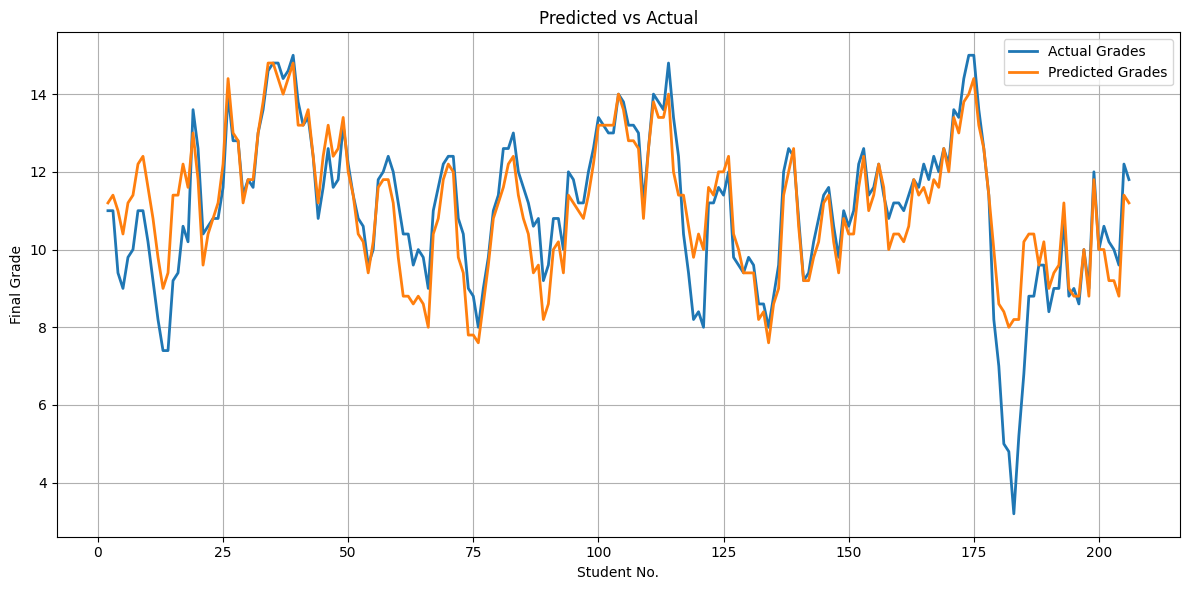

In [12]:
plot_predictions(linear_model,X_test, y_test)

Text(0.5, 1.0, 'Residuals Linear Regression Distribution')

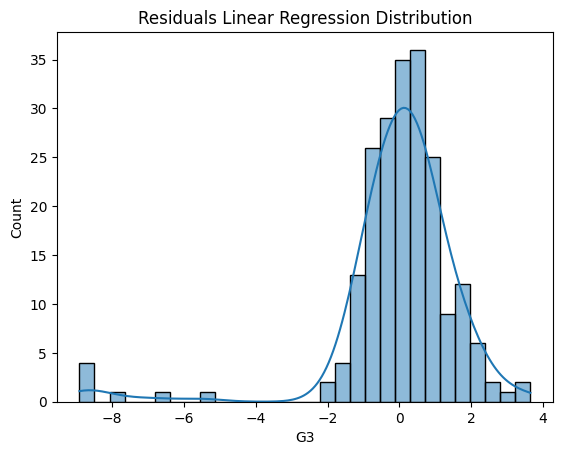

In [13]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Linear Regression Distribution")

In [14]:
save_model(linear_model, '../models/linear_regression_model.pkl')

Random Forest Model

In [32]:
X = df.drop(columns=['G3'])
y = df['G3']

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

randomFor_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomFor_model.fit(X_train, y_train)

{'max_depth': 3, 'n_estimators': 200}


RandomForestRegressor(random_state=42)

In [33]:
y_pred = randomFor_model.predict(X_test)
evaluate_model(y_test, y_pred)

print("Grid Search Best Parameters: ", grid.best_params_)
print("Grid Search Best Score: ", grid.best_score_)

Mean Squared Error: 3.02954609019844
Mean Absolute Error: 0.9812064251537936
R2 Score: 0.8040500800096573
Grid Search Best Parameters:  {'max_depth': 3, 'n_estimators': 200}
Grid Search Best Score:  0.8538288969950888


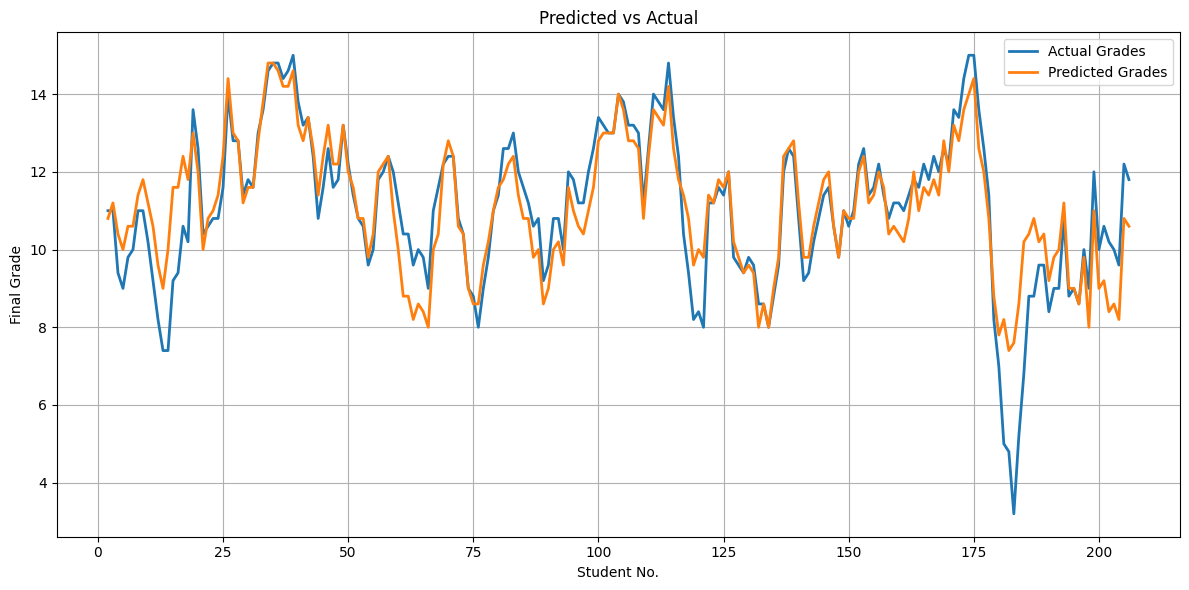

In [17]:
plot_predictions(randomFor_model,X_test,y_test)
save_model(randomFor_model, '../models/random_forest_model.pkl')

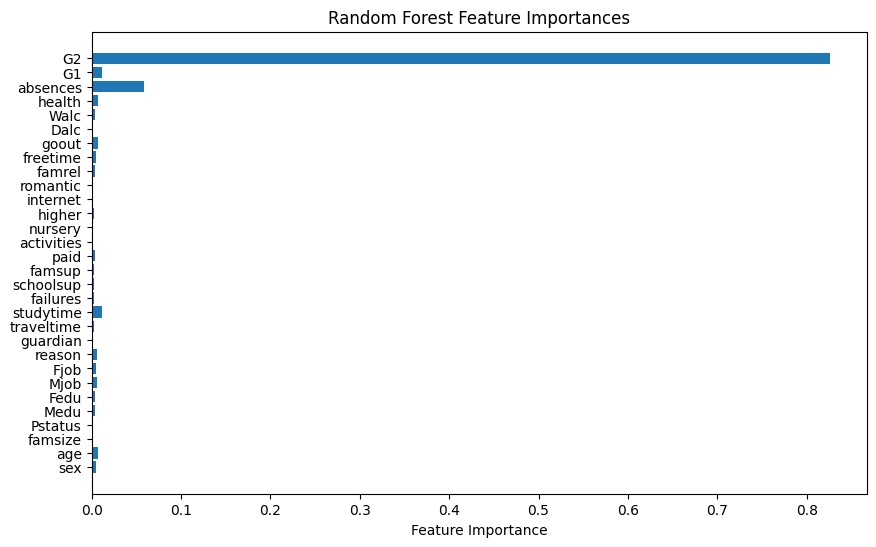

In [18]:
importances = randomFor_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

Text(0.5, 1.0, 'Residuals Random Forest Distribution')

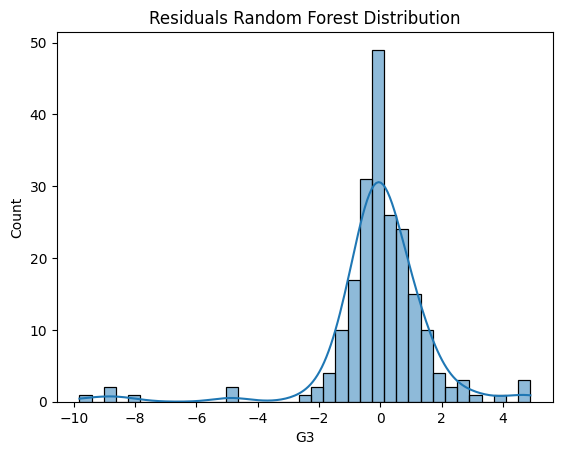

In [ ]:
# Check for overfitting
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Random Forest Distribution")

Gradient Boosting

In [35]:
X = df.drop(columns=['G3'])
y = df['G3']

param_random = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_random, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

print(random_search.best_params_)

gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_model.fit(X_train, y_train)

{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}


GradientBoostingRegressor(random_state=42)

In [36]:
y_pred = gradient_model.predict(X_test)
evaluate_model(y_test, y_pred)

print("Random Search Best Parameters: ", random_search.best_params_)
print("Random Search Best Score: ", random_search.best_score_)

Mean Squared Error: 2.638886251219793
Mean Absolute Error: 0.9407338208478407
R2 Score: 0.8293178138259438
Random Search Best Parameters:  {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
Random Search Best Score:  0.8417839095734602


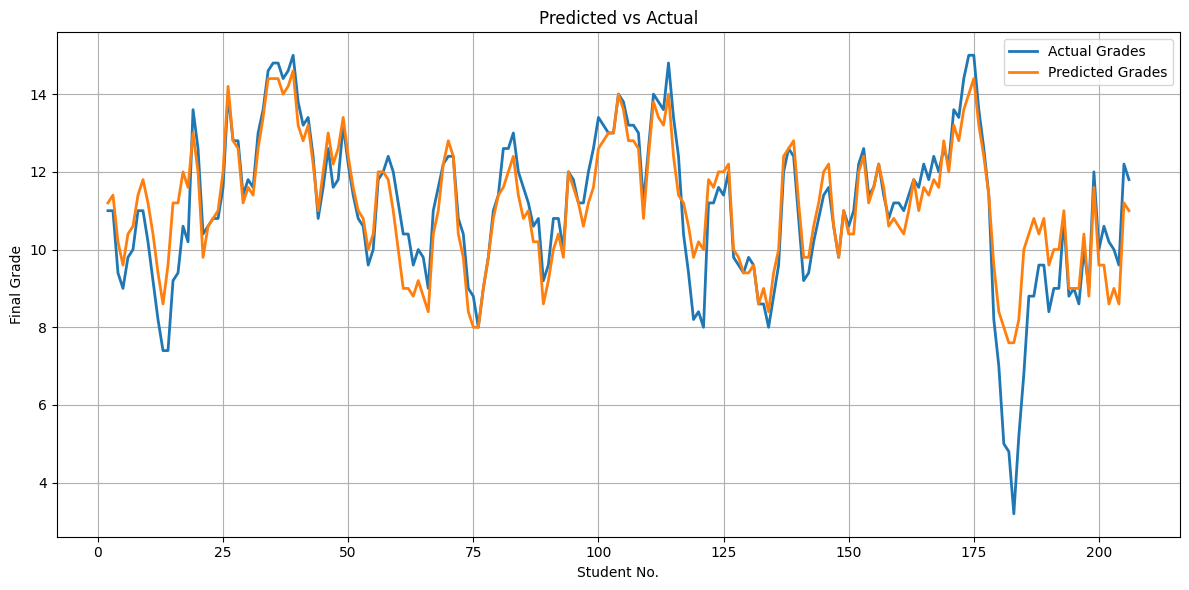

In [22]:
plot_predictions(gradient_model,X_test,y_test)

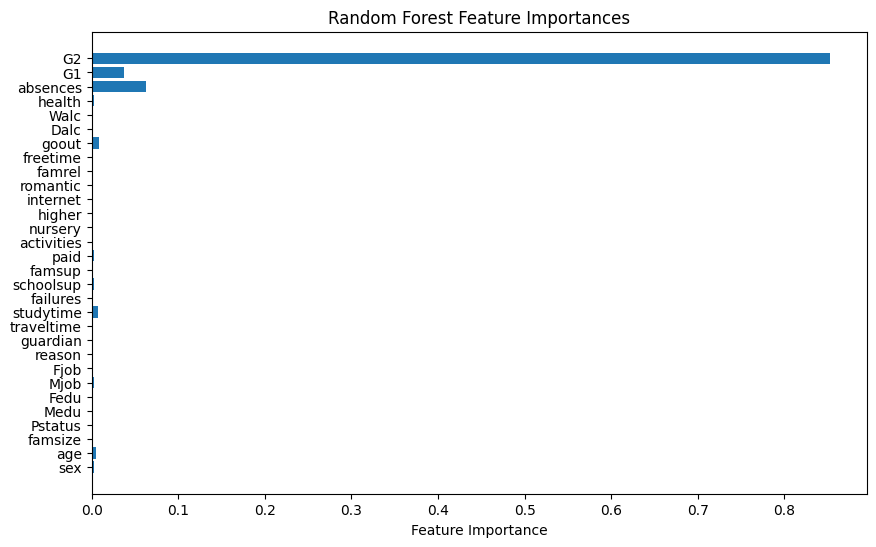

In [23]:
importances = gradient_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

Text(0.5, 1.0, 'Residual Gradient Boosting Plot')

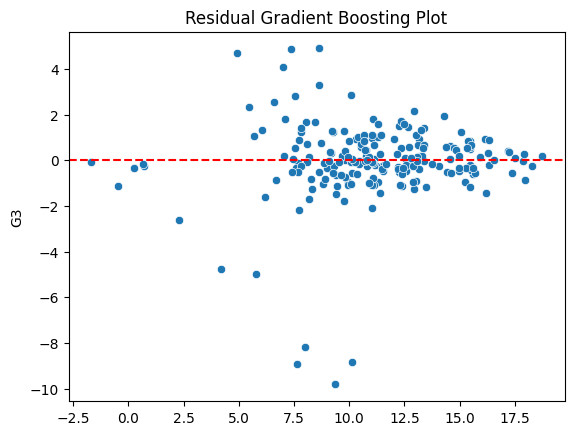

In [24]:
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Gradient Boosting Plot")

In [25]:
save_model(gradient_model, '../models/gradient_boosting_model.pkl')

Compare models on the same data

In [26]:
# Cross-Validation (K-Fold CV) to check the model performance
models = ['LinearRegression', 'RandomForest', 'GradientBoosting']
model_scores = [linear_model.score(X_test, y_test), randomFor_model.score(X_test, y_test), gradient_model.score(X_test, y_test)]

for model in [linear_model, randomFor_model, gradient_model]:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("R2 Score of " + model.__class__.__name__ + ":", scores.mean())


R2 Score of LinearRegression: 0.7947773191120462
R2 Score of RandomForestRegressor: 0.7756926202030219
R2 Score of GradientBoostingRegressor: 0.7812845562343433


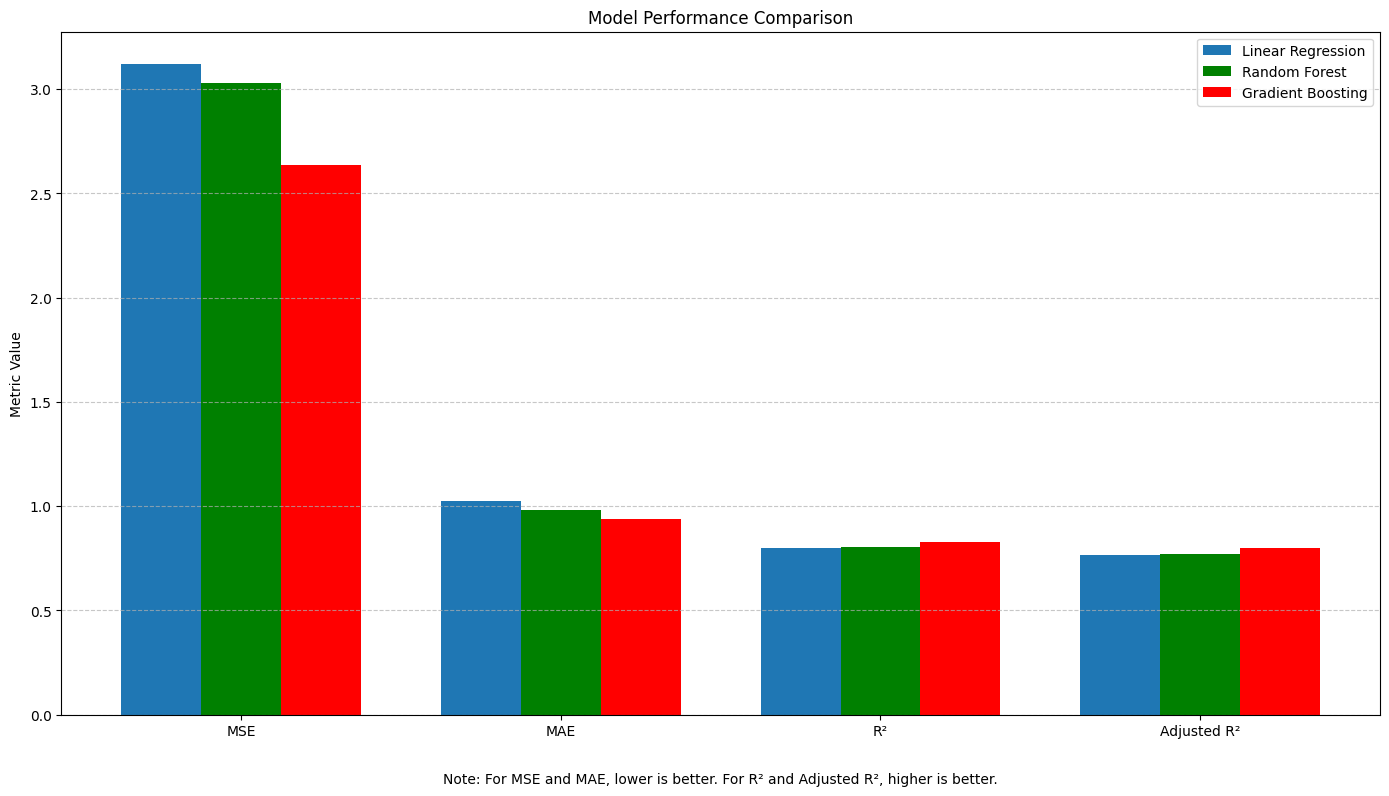

Model Metrics Comparison:
               Model     MSE     MAE      R²  Adjusted R²
0  Linear Regression  3.1202  1.0249  0.7982       0.7642
1      Random Forest  3.0295  0.9812  0.8041       0.7710
2  Gradient Boosting  2.6389  0.9407  0.8293       0.8006


In [28]:
models_list = [linear_model, randomFor_model, gradient_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Initialize empty lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Calculate adjusted R2 function
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

adj_r2_scores = []

# Calculate metrics for each model
for model in models_list:
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

# Create a dataframe to hold all metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R²': r2_scores,
    'Adjusted R²': adj_r2_scores
})

# Set up the metrics for plotting
metrics = ['MSE', 'MAE', 'R²', 'Adjusted R²']
x = np.arange(len(metrics))
width = 0.25  # Width of bars (narrower for 3 models)

# Create the figure
plt.figure(figsize=(14, 8))

# Plot bars for each model
plt.bar(x - width, [mse_scores[0], mae_scores[0], r2_scores[0], adj_r2_scores[0]], 
        width, label=model_names[0])
plt.bar(x, [mse_scores[1], mae_scores[1], r2_scores[1], adj_r2_scores[1]], 
        width, label=model_names[1], color='green')
plt.bar(x + width, [mse_scores[2], mae_scores[2], r2_scores[2], adj_r2_scores[2]], 
        width, label=model_names[2], color='red')

# Add labels and formatting
plt.ylabel('Metric Value')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()

# Add a note about interpretation
plt.annotate('Note: For MSE and MAE, lower is better. For R² and Adjusted R², higher is better.', 
             xy=(0.5, -0.1), xycoords='axes fraction', ha='center')

# Adjust layout and show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the metrics in a table
print("Model Metrics Comparison:")
print(metrics_df.round(4))
